In [2]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as img
from matplotlib import cm
import matplotlib
import numpy as np
import pingouin as pg
from collections import Counter
from paired_connectivity_analyzer import EEGPairedPermutationAnalyser, DrawEEG
from plotting_utils import plot_compute_sign_differences, draw_edges_by_dict, plot_reproducibility_pattern, plot_reproducibility_by_frequency

from statistics import mean
from metrics import dice, jaccard

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
df = pd.read_csv('eeg_dataframe_nansfilled.csv', index_col=0)
analyzer = EEGPairedPermutationAnalyser(data_df=df, num_perm=1000, thres=0.001)

In [4]:
df

,Fp1/Fp2_1_fo,Fp1/F7_1_fo,Fp1/F3_1_fo,Fp1/Fz_1_fo,Fp1/F4_1_fo,Fp1/F8_1_fo,Fp1/T3_1_fo,Fp1/C3_1_fo,Fp1/Cz_1_fo,Fp1/C4_1_fo,...,Pz/P4_7_fz,Pz/T6_7_fz,Pz/O1_7_fz,Pz/O2_7_fz,P4/T6_7_fz,P4/O1_7_fz,P4/O2_7_fz,T6/O1_7_fz,T6/O2_7_fz,O1/O2_7_fz
abs_,-0.067816,-0.190843,0.197049,0.082941,-0.431078,-0.880805,-1.597362,-0.486399,-0.505033,-0.634386,...,-0.369614,-1.591706,-0.671730,-0.722746,-1.030530,-1.353433,-0.547397,-2.283078,-0.838246,-1.366732
agv_,-0.063064,0.149510,-1.470177,-2.307671,-4.443682,-1.542283,-1.490230,-1.053519,-1.771533,-3.276315,...,-0.399129,-1.244996,-0.463251,-0.535564,-1.440858,-1.157720,-0.681816,-1.764711,-0.533204,-1.412399
ami_,-0.456335,-0.437952,-0.133411,-0.656705,-0.498032,-1.281238,-1.952807,-1.150458,-1.865200,-1.718330,...,-0.100816,-0.595306,-0.283766,-0.117159,0.246866,-0.786120,0.194194,-0.788818,-0.051139,-0.387762
ast_,-1.161369,-1.080370,-1.011179,-1.569420,-3.917162,-2.127779,-2.692695,-2.732259,-2.059262,-3.841575,...,-0.077291,-1.674175,-0.636853,-0.970301,-0.401405,-0.866471,0.059785,-1.264972,0.262019,-0.799658
avk_,-1.344665,-3.841575,-4.795873,-3.105343,-3.917162,-2.839805,-1.620330,-3.074839,-2.087983,-1.828024,...,-0.516737,-2.283078,-0.907005,-0.545027,-1.792309,-2.550227,-1.661937,-0.818822,-0.491047,-0.869325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vls_,0.309057,-0.588057,-0.190843,-0.417361,-0.231765,0.252898,-0.403681,-0.639324,-0.600152,-0.349243,...,-0.707283,-1.194784,-0.712422,-0.671730,-0.535564,-0.764710,-0.295050,-1.090605,-0.725338,-0.684346
voo_,-0.437952,-1.143244,-0.353766,-0.424215,-0.588057,-1.460305,-1.785331,-1.260946,-1.209979,-1.421794,...,-0.451732,-1.056841,-0.447133,-0.631922,-0.186278,-0.970301,-0.144968,-1.465228,-0.258922,-0.694503
zab_,-1.281238,-2.911332,-2.936540,-2.654844,-3.136956,-4.602049,-1.183529,-2.600973,-3.772040,-1.828024,...,-1.209979,-1.603051,-0.371880,-0.281508,0.047082,-1.183529,-0.479438,-1.547648,-0.788818,-0.112499
zak_,-0.074926,-0.421929,-0.265701,-0.491047,-2.936540,-0.829889,-4.091480,-2.911332,-1.037052,-1.536948,...,-0.177134,-1.872822,-0.408238,-0.474806,-1.221522,-1.252940,-0.456335,-2.795185,-1.417085,-1.076978


In [5]:
def channels_per_size(analyzer, num_it, group_size, num_reps, factor, band):
    '''
    Returns significant channels for given group size and band
    
    num_it : int, number of iterations of creating groups of fixed size
    group_size : int, size of a subgroup
    num_reps : int, number of repetitions or psevdo experiments
    factor : float from 0 to 1
    band : int
    '''
    channels_ = []
    for i in range(num_it):
        channels_.append(analyzer.compute_reproducible_pattern(size=group_size,
                                                                num_reps=num_reps,
                                                                factor=factor,band=band,
                                                         replace=False,is_param=True)['channels'])
        i+=1
    #print(f"Significant channels for group of size {group_size} for band {analyzer.key_bands[band]}")
    return channels_

In [10]:
num1 = analyzer.compute_reproducible_pattern(size=59,num_reps=150,factor=0.4,band=5,replace=False,is_param=True)['channels']

100%|█████████████████████████████████████████| 150/150 [00:43<00:00,  3.46it/s]


In [11]:
num2 = analyzer.compute_reproducible_pattern(size=59,num_reps=150,factor=0.4,band=5,replace=False,is_param=True)['channels']

100%|█████████████████████████████████████████| 150/150 [00:43<00:00,  3.45it/s]


In [13]:
num3 = analyzer.compute_reproducible_pattern(size=59,num_reps=150,factor=0.4,band=5,replace=False,is_param=True)['channels']

100%|█████████████████████████████████████████| 150/150 [00:42<00:00,  3.53it/s]


In [14]:
dice(num2, num3)

0.967741935483871

Вот здесь он уже большой, получается, значит, проблема уже на самом первом шаге...

In [61]:
# возвращает средний dice попарно сравненных значимых каналов для определённого размера
def mean_dice(analyzer, num_it, group_size, num_reps, factor, band):
    '''
    Returns float mean value of dice coefficients for given group size and band
    
    num_it : int, number of iterations of creating groups of fixed size
    group_size : int, size of a subgroup
    num_reps : int, number of repetitions or psevdo experiments
    factor : float from 0 to 1
    band : int
    '''
    from statistics import mean
    channels = []
    for i in range(num_it):
        channels.append(analyzer.compute_reproducible_pattern(num_reps=num_reps,
                                                              factor=factor,
                                                              band=band)['channels'])
        i+=1
    dice_coef = []
    for i in range(len(channels)):
        if i == len(channels)-1:
            return mean(dice_coef)
        else:
            dice_coef.append(dice(set(channels[i]),
                                  set(channels[i+1])))

In [60]:
sizes = [30, 59, 89, 118, 177]
extended_sizes = [30, 46, 62, 78, 94, 110, 126, 142, 158, 177]

In [62]:
# возвращает список средних dice попарно сравненных значимых каналов для всех размеров
def mean_dice_per_size(analyzer, sizes, num_it, num_reps, factor, band):
    '''
    Returns a list of mean values of dice coefficients for all sizes for given band
    
    num_it : int, number of iterations of creating subgroups of fixed size
    sizes : list, list of sizes
    num_reps : int, number of repetitions or psevdo experiments
    factor : float from 0 to 1
    band : int
    '''
    dice_coefs_band = []
    for i in range(len(sizes)):
        dice_coefs_band.append(mean_dice(analyzer, num_it=num_it, group_size=sizes[i], num_reps=num_reps, factor=factor, band=band))
    return dice_coefs_band

In [64]:
meansd = mean_dice_per_size(analyzer, sizes, 10, 150, 0.4, 5)

100%|█████████████████████████████████████████| 150/150 [00:49<00:00,  3.01it/s]


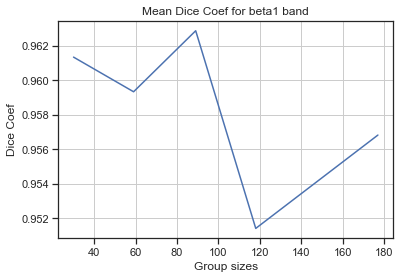

In [66]:
sns.set(style = "ticks")
sns.lineplot(x = sizes,y = meansd).set(title = 'Mean Dice Coef for beta1 band', )
plt.xlabel("Group sizes")
plt.ylabel("Dice Coef")
plt.grid()
plt.show()

In [67]:
def list_of_dices(analyzer, num_it, group_size, num_reps, factor, band):
    '''
    Returns significant channels for given group size and band
    
    num_it : int, number of iterations of creating groups of fixed size
    group_size : int, size of a subgroup
    num_reps : int, number of repetitions or psevdo experiments
    factor : float from 0 to 1
    band : int
    '''
    channels = []
    for i in range(num_it):
        analyzer.get_subgroup(group_size)
        channels.append(analyzer.compute_reproducible_pattern(num_reps=num_reps,
                                                              factor=factor,
                                                              band=band)['channels'])
        i+=1
    #print(f"Significant channels for group of size {group_size} for band {analyzer.key_bands[band]}")
    dice_coef = []
    for i in range(len(channels)):
        if i == len(channels)-1:
            return dice_coef
        else:
            dice_coef.append(dice(set(channels[i]),
                                  set(channels[i+1])))

In [68]:
def list_of_dices_per_band(analyzer, sizes, num_it, num_reps, factor, band):
    '''
    Returns a list of dices for all sizes for given band
    
    sizes : list, list of sizes
    num_it : int, number of iterations of creating groups of fixed size
    num_reps : int, number of repetitions or psevdo experiments
    factor : float from 0 to 1
    band : int
    '''
    dices_per_band = []
    for i in range(len(sizes)):
        channels = []
        for j in range(num_it):
            analyzer.get_subgroup(sizes[i])
            channels.append(analyzer.compute_reproducible_pattern(num_reps=num_reps,
                                                                  factor=factor,
                                                                  band=band)['channels'])
            j+=1
    #print(f"Significant channels for group of size {group_size} for band {analyzer.key_bands[band]}")
        dice_coef = []
        for k in range(len(channels)):
            if k == len(channels)-1:
                break
            else:
                dice_coef.append(dice(set(channels[k]),
                                      set(channels[k+1])))
            dice_coef.sort()
        dices_per_band.append(dice_coef)
    return dices_per_band
# returns a list of dices for groups of different sizes, same band

In [69]:
bands = []
for i in analyzer.key_bands.values():
    bands.append(i)
keys = []
for i in analyzer.key_bands.keys():
    keys.append(i)

In [70]:
# creates a dictionary of all sizes and bands
dices_per_bands = {}
for i in range(len(analyzer.key_bands.values())):
    dices_per_bands[f'{bands[i]}'] = list_of_dices_per_band(analyzer, sizes, num_it=3, num_reps=30, factor=0.4, band=keys[i])

100%|███████████████████████████████████████████| 30/30 [00:08<00:00,  3.42it/s]


In [71]:
df = pd.DataFrame.from_dict(dices_per_bands)
df.insert(0, "size", sizes, True)

In [72]:
df

,size,delta,theta,alpha1,alpha2,beta1,beta2,gamma
0,30,"[0.6923076923076923, 0.7857142857142857]","[0.7586206896551724, 0.7857142857142857]","[0.9, 0.9156626506024096]","[0.9580838323353293, 0.968944099378882]","[0.8648648648648649, 0.8732394366197183]","[0.9310344827586207, 0.9655172413793104]","[0.7692307692307693, 0.875]"
1,59,"[0.7692307692307693, 0.8461538461538461]","[0.8, 0.9032258064516129]","[0.926829268292683, 0.9397590361445783]","[0.9285714285714286, 0.9534883720930233]","[0.9090909090909091, 0.9090909090909091]","[0.8888888888888888, 0.9508196721311475]","[0.7058823529411765, 0.875]"
2,89,"[0.72, 0.8181818181818182]","[0.7407407407407407, 0.8148148148148148]","[0.8860759493670886, 0.8860759493670886]","[0.9575757575757575, 0.9651162790697675]","[0.8717948717948718, 0.8918918918918919]","[0.9032258064516129, 0.9552238805970149]","[0.8, 0.8235294117647058]"
3,118,"[0.8695652173913043, 0.9523809523809523]","[0.75, 0.8461538461538461]","[0.8433734939759037, 0.8450704225352113]","[0.9512195121951219, 0.9818181818181818]","[0.9, 0.9333333333333333]","[0.9491525423728814, 0.9508196721311475]","[0.875, 0.9411764705882353]"
4,177,"[0.75, 0.782608695652174]","[0.8888888888888888, 0.8888888888888888]","[0.821917808219178, 0.8947368421052632]","[0.9523809523809523, 0.9642857142857143]","[0.8205128205128205, 0.8311688311688312]","[0.9259259259259259, 0.9310344827586207]","[0.75, 0.7692307692307693]"


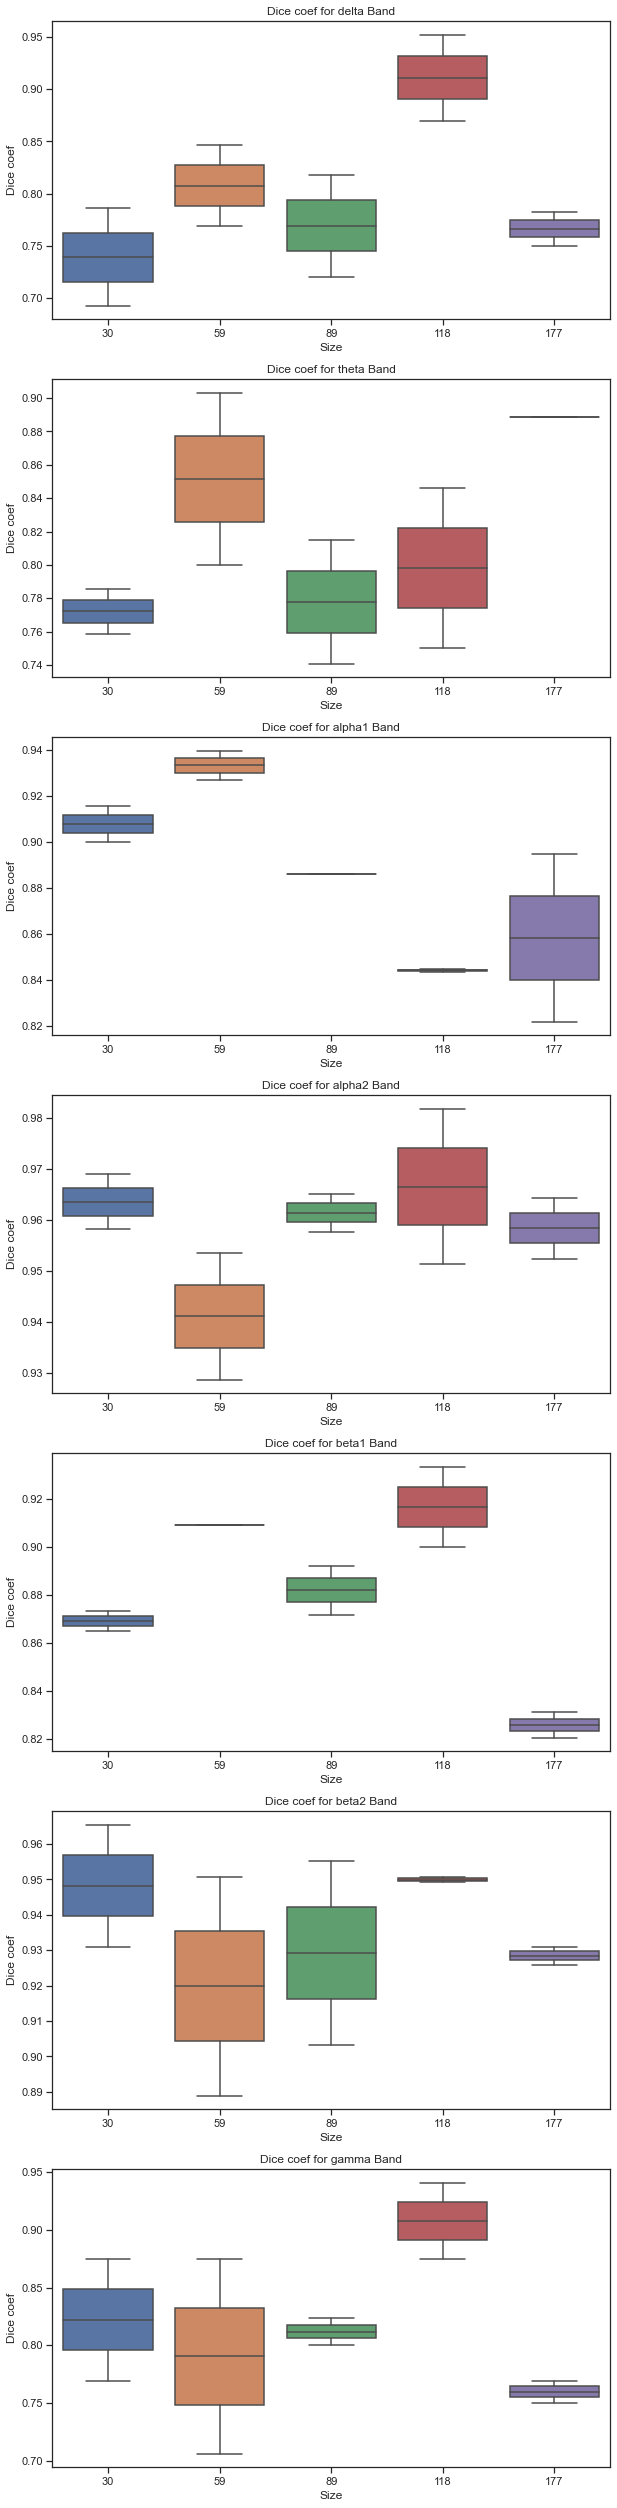

In [73]:
fig, axs = plt.subplots(7, 1, figsize=(10, 45))
for i in range(len(bands)):
    sns.boxplot(data=df.explode(bands[i]), x = "size", y = bands[i], 
                ax = axs[i]).set(title = f'Dice coef for {bands[i]} Band', xlabel = 'Size', ylabel = 'Dice coef')
plt.show()